# 2. 분류

In [1]:
import numpy as np
import pandas as pd
import os
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
df_youtube = pd.read_csv("C:/netsong7/pythonwork/AI/data cleaning(final)/youtubecomment.csv", encoding='utf-8-sig')
df_cafe = pd.read_csv("C:/netsong7/pythonwork/AI/data cleaning(final)/navercafe.csv", encoding='utf-8-sig')
df_shopping = pd.read_csv("C:/netsong7/pythonwork/AI/data cleaning(final)/navershopping.csv", encoding='utf-8-sig')

In [18]:
okt = Okt()

In [21]:
stopwords = pd.read_table("stopwords.txt", encoding='utf-8-sig', header=None)
stopwords = list(stopwords[0])

In [22]:
total_data = df_shopping[["review","star"]]

In [23]:
total_data["review"] = list(map(str, list(total_data["review"])))

In [24]:
# df_cafe, df_shopping, df_youtube
total_data['tokenized'] = total_data['review'].apply(okt.morphs)
total_data['tokenized'] = total_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [25]:
total_data = total_data[["tokenized","star"]]
total_data

,tokenized,star
0,"[말, 그래도, 최고, 입니다, 당일, 배송, 맞구요, 택배, 파업, 늦어질, 줄,...",5
1,"[삼성, 전자, 갤럭시, 워치, 사고, 싶지만, 가격, 대가, 높아서, 망설이던, ...",5
2,"[실, 구매, 원, 구매, 했습니다, 친구, 선물, 로, 사줬는데, 엄청, 좋아하네...",5
3,"[제, 생일, 기념, 해서, 부모님, 께, 각각, 왓치, 하나, 씩, 사, 드렸어요...",5
4,"[화면, 큰, 걸, 로, 하고싶어서, 실버, 로, 구매, 했는데, 손목, 대비, 살...",5
...,...,...
13433,"[제품, 좋아요, 사용, 하고, 있습니다]",3
13434,[삼성],3
13435,"[개인정보, 만, 털린게, 아닌지, 어쨌든, 기대, 해봅니다]",2
13436,"[구, 매, 확정, 하, 래, ㅋㄲㅋ, 증시, 난다]",1


In [102]:
total_data['label'] = np.select([total_data.star > 4], [1], default=0)
total_data

,tokenized,star,label
0,"[말, 그래도, 최고, 입니다, 당일, 배송, 맞구요, 택배, 파업, 늦어질, 줄,...",5,1
1,"[삼성, 전자, 갤럭시, 워치, 사고, 싶지만, 가격, 대가, 높아서, 망설이던, ...",5,1
2,"[실, 구매, 원, 구매, 했습니다, 친구, 선물, 로, 사줬는데, 엄청, 좋아하네...",5,1
3,"[제, 생일, 기념, 해서, 부모님, 께, 각각, 왓치, 하나, 씩, 사, 드렸어요...",5,1
4,"[화면, 큰, 걸, 로, 하고싶어서, 실버, 로, 구매, 했는데, 손목, 대비, 살...",5,1
...,...,...,...
13433,"[제품, 좋아요, 사용, 하고, 있습니다]",3,0
13434,[삼성],3,0
13435,"[개인정보, 만, 털린게, 아닌지, 어쨌든, 기대, 해봅니다]",2,0
13436,"[구, 매, 확정, 하, 래, ㅋㄲㅋ, 증시, 난다]",1,0


In [26]:
train_data, test_data = train_test_split(total_data, test_size=0.2, random_state=0)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 10750
테스트용 리뷰의 개수 : 2688


In [55]:
train_data["star"].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [27]:
words_1 = np.hstack(train_data[train_data["star"] == 1]['tokenized'].values)
words_2 = np.hstack(train_data[train_data["star"] == 2]['tokenized'].values)
words_3 = np.hstack(train_data[train_data["star"] == 3]['tokenized'].values)
words_4 = np.hstack(train_data[train_data["star"] == 4]['tokenized'].values)
words_5 = np.hstack(train_data[train_data["star"] == 5]['tokenized'].values)

In [28]:
words_1_count = Counter(words_1)
print(words_1_count.most_common(20))
print("==================================================================================")
words_2_count = Counter(words_2)
print(words_2_count.most_common(20))
print("==================================================================================")
words_3_count = Counter(words_3)
print(words_3_count.most_common(20))
print("==================================================================================")
words_4_count = Counter(words_4)
print(words_4_count.most_common(20))
print("==================================================================================")
words_5_count = Counter(words_5)
print(words_5_count.most_common(20))

[('센터', 279), ('배송', 259), ('안', 247), ('제품', 246), ('서비스', 234), ('불량', 182), ('로', 166), ('하고', 164), ('에서', 162), ('구매', 144), ('요', 137), ('일', 134), ('상품', 122), ('교환', 117), ('삼성', 115), ('판매', 114), ('반품', 111), ('했는데', 108), ('만', 103), ('해서', 98)]
[('배송', 126), ('센터', 115), ('제품', 108), ('서비스', 91), ('안', 89), ('불량', 75), ('너무', 75), ('로', 62), ('사용', 61), ('에서', 56), ('구매', 56), ('요', 54), ('교환', 53), ('하고', 53), ('해서', 46), ('때', 45), ('것', 44), ('귀', 43), ('일', 42), ('이어폰', 41)]
[('배송', 480), ('사용', 284), ('제품', 273), ('안', 226), ('로', 192), ('구매', 192), ('요', 182), ('너무', 182), ('좋아요', 175), ('것', 167), ('센터', 159), ('했는데', 157), ('하고', 144), ('음질', 144), ('에서', 143), ('가격', 141), ('서비스', 136), ('생각', 133), ('더', 130), ('때', 130)]
[('배송', 1135), ('사용', 973), ('로', 756), ('구매', 626), ('너무', 623), ('제품', 570), ('것', 570), ('버즈', 529), ('좋아요', 523), ('안', 496), ('하고', 460), ('때', 451), ('에서', 442), ('더', 423), ('음질', 420), ('보다', 418), ('요', 413), ('했는데', 411), ('생각', 405), (

1점 리뷰의 평균 길이 : 34.569940476190474
2점 리뷰의 평균 길이 : 25.935897435897434
3점 리뷰의 평균 길이 : 20.27255985267035
4점 리뷰의 평균 길이 : 29.775
5점 리뷰의 평균 길이 : 56.67841316733488


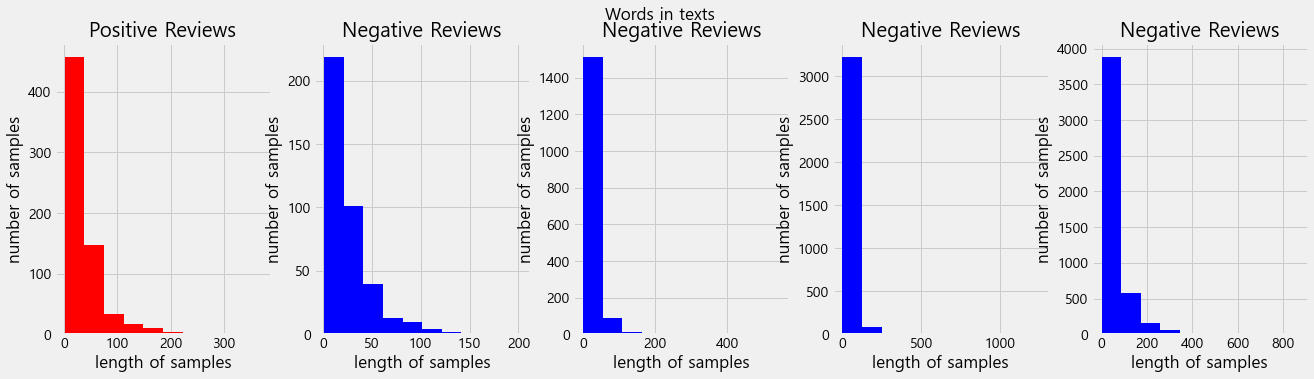

In [29]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,5))
text_len = train_data[train_data['star']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('1점 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['star']==2]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('2점 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['star']==3]['tokenized'].map(lambda x: len(x))
ax3.hist(text_len, color='blue')
ax3.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax3.set_xlabel('length of samples')
ax3.set_ylabel('number of samples')
print('3점 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['star']==4]['tokenized'].map(lambda x: len(x))
ax4.hist(text_len, color='blue')
ax4.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax4.set_xlabel('length of samples')
ax4.set_ylabel('number of samples')
print('4점 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['star']==5]['tokenized'].map(lambda x: len(x))
ax5.hist(text_len, color='blue')
ax5.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax5.set_xlabel('length of samples')
ax5.set_ylabel('number of samples')
print('5점 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [30]:
X_train = train_data['tokenized'].values
y_train = train_data['star'].values
X_test= test_data['tokenized'].values
y_test = test_data['star'].values

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [32]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29907
등장 빈도가 1번 이하인 희귀 단어의 수: 14879
단어 집합에서 희귀 단어의 비율: 49.7508944394289
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.42974768453421


In [33]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 15030


In [34]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

리뷰의 최대 길이 : 1242
리뷰의 평균 길이 : 40.35553488372093


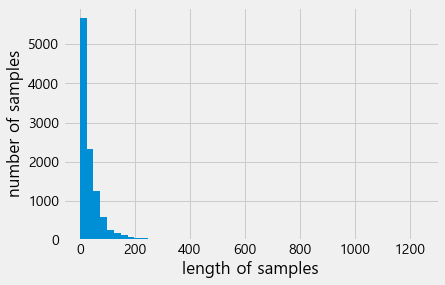

In [35]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [36]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))


In [37]:
max_len = 500
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 99.86046511627907


In [38]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(10750, 500)
(2688, 500)
(10750,)
(2688,)


In [75]:
from keras.utils import to_categorical
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print(X_train.shape)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_test.shape)

y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)
y_data

y_train = y_data[:10750]
y_test = y_data[10750:]

print(y_train.shape)
print(y_test.shape)

(10750, 500, 1)
(2688, 500, 1)
(10750, 6)
(2688, 6)


In [83]:
from keras.layers import SimpleRNN
import keras
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.optimizers import RMSprop, Adam, SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# model = Sequential()
# model.add(Dense(64, input_dim=(500,1), activation="relu"))
# model.add(Dense(64, activation="relu"))
# model.add(Dense(6, activation="softmax"))

# model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

# model.summary()

# model.fit(X_train, y_train, epochs=15, batch_size=32)

In [91]:
def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(units=50, input_shape=(500, 1), return_sequences=False))
    model.add(Dense(6, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    
    return model

In [92]:
model = KerasClassifier(build_fn=vanilla_rnn, epochs=20, batch_size=50, verbose=1)
model.fit(X_train, y_train) # loss: 0.8624 - accuracy: 0.7405

Epoch 1/20
10750/10750 [==============================] - 16s 1ms/step - loss: 1.3484 - accuracy: 0.4359
Epoch 2/20
10750/10750 [==============================] - 16s 2ms/step - loss: 1.3005 - accuracy: 0.4388
Epoch 3/20
10750/10750 [==============================] - 18s 2ms/step - loss: 1.2973 - accuracy: 0.4371
Epoch 4/20
10750/10750 [==============================] - 17s 2ms/step - loss: 1.2951 - accuracy: 0.4384
Epoch 5/20
10750/10750 [==============================] - 17s 2ms/step - loss: 1.2936 - accuracy: 0.4394
Epoch 6/20
10750/10750 [==============================] - 17s 2ms/step - loss: 1.2947 - accuracy: 0.4388
Epoch 7/20
10750/10750 [==============================] - 17s 2ms/step - loss: 1.2924 - accuracy: 0.4396
Epoch 8/20
10750/10750 [==============================] - 17s 2ms/step - loss: 1.2914 - accuracy: 0.4397
Epoch 9/20
10750/10750 [==============================] - 17s 2ms/step - loss: 1.2934 - accuracy: 0.4393
Epoch 10/20
10750/10750 [==============================

In [93]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis=1)
print(accuracy_score(y_pred, y_test_))

2688/2688 [==============================] - 1s 487us/step
0.4337797619047619


In [94]:
def stacked_vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(units=50, input_shape=(500, 1), return_sequences=True))
    model.add(SimpleRNN(units=50, return_sequences=False))
    model.add(Dense(6, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    
    return model
model = KerasClassifier(build_fn=stacked_vanilla_rnn, epochs=10, batch_size=50, verbose=1)
model.fit(X_train, y_train) # loss: 0.8624 - accuracy: 0.7405

y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis=1)
print(accuracy_score(y_pred, y_test_))

Epoch 1/10
10750/10750 [==============================] - 36s 3ms/step - loss: 1.3081 - accuracy: 0.4438
Epoch 2/10
10750/10750 [==============================] - 38s 3ms/step - loss: 1.2880 - accuracy: 0.4475
Epoch 3/10
10750/10750 [==============================] - 37s 3ms/step - loss: 1.2654 - accuracy: 0.4587
Epoch 4/10
10750/10750 [==============================] - 38s 4ms/step - loss: 1.2684 - accuracy: 0.4588
Epoch 5/10
10750/10750 [==============================] - 37s 3ms/step - loss: 1.2521 - accuracy: 0.4612
Epoch 6/10
10750/10750 [==============================] - 38s 4ms/step - loss: 1.2476 - accuracy: 0.4671
Epoch 7/10
10750/10750 [==============================] - 40s 4ms/step - loss: 1.2401 - accuracy: 0.4687
Epoch 8/10
10750/10750 [==============================] - 37s 3ms/step - loss: 1.2384 - accuracy: 0.4624
Epoch 9/10
10750/10750 [==============================] - 36s 3ms/step - loss: 1.2450 - accuracy: 0.4660
Epoch 10/10
2688/2688 [==============================] 

In [99]:
from keras.layers import *
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50

CLASS_COUNT = 10

base_model = ResNet50(
    weights='imagenet',
    include_top=False, 
    input_shape=(224, 224, 3), 
    pooling='avg',
)
base_model.trainable = False

model = Sequential([
  base_model,
  Dense(CLASS_COUNT, activation='softmax'),
])


94658560/94653016 [==============================] - 106s 1us/step


In [100]:
def lstm_rnn():
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(500, 1), return_sequences=False))
    model.add(Dense(6, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])
    
    return model

model = KerasClassifier(build_fn=lstm_rnn, epochs=10, batch_size=50, verbose=1)
model.fit(X_train, y_train) # loss: 0.8624 - accuracy: 0.7405

y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis=1)
print(accuracy_score(y_pred, y_test_))

Epoch 1/10
10750/10750 [==============================] - 50s 5ms/step - loss: 1.3278 - accuracy: 0.4376
Epoch 2/10
10750/10750 [==============================] - 52s 5ms/step - loss: 1.2328 - accuracy: 0.4636
Epoch 3/10
10750/10750 [==============================] - 52s 5ms/step - loss: 1.2239 - accuracy: 0.4655
Epoch 4/10
10750/10750 [==============================] - 53s 5ms/step - loss: 1.2200 - accuracy: 0.4683
Epoch 5/10
10750/10750 [==============================] - 54s 5ms/step - loss: 1.2176 - accuracy: 0.4650
Epoch 6/10
10750/10750 [==============================] - 52s 5ms/step - loss: 1.2145 - accuracy: 0.4705
Epoch 7/10
10750/10750 [==============================] - 53s 5ms/step - loss: 1.2132 - accuracy: 0.4714
Epoch 8/10
10750/10750 [==============================] - 55s 5ms/step - loss: 1.2092 - accuracy: 0.4706
Epoch 9/10
10750/10750 [==============================] - 53s 5ms/step - loss: 1.2056 - accuracy: 0.4729
Epoch 10/10
2688/2688 [==============================] 

[[  2   0   2  93  93]
 [  0   0   3  52  46]
 [  1   0   8 240 186]
 [  1   0   6 337 444]
 [  2   0   4 264 904]]


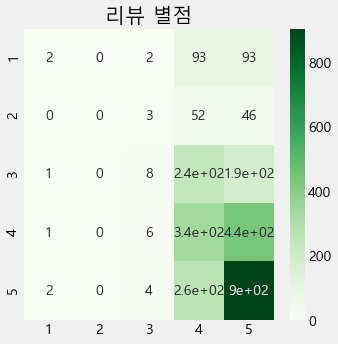

In [101]:
# confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

LABELS = ['1','2','3','4','5']
mat = confusion_matrix(y_test_ , y_pred)

plt.rcParams["figure.figsize"] = (5,5)
plt.title("리뷰 별점")
sns.heatmap(mat,
            xticklabels=LABELS, yticklabels=LABELS,
            annot = True, #실제 값 화면에 나타내기
            cmap = 'Greens' #색상
            )
print(mat)